In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
 #will show u visualization within notebook

In [ ]:
data=pd.read_csv("titanic_train.csv")

In [ ]:
data.head()
 #sibsp is sibling spouse ----> it has total count of sibling spouse 
 #parch is parent child ------> it has total count of parent child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#MISSING DATA

In [ ]:
data.isnull()  # if true means value is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()  # will give sum of null values in particular column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

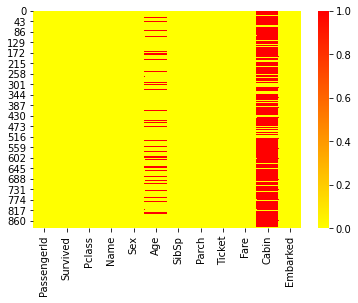

In [ ]:
# this will help to find which columns have more null value so we see cabin has more null value so we hande that
sns.heatmap(data.isnull(),cmap="autumn_r")  
# if you want to remove labels in xaxis use xticklabels=False
# for y axis use yticklabels=False

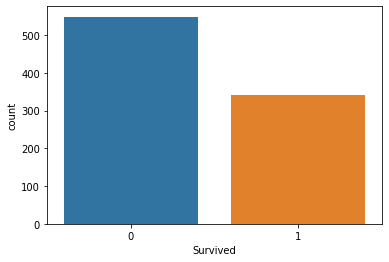

In [ ]:
sns.countplot(x="Survived",data=data)
#in survived data we have 0(did not survive),1(survived) from that we are gonna find that how many survived
#From results we can see that more that 500 did not survive shown in blue plot and more that 300 survied shown in orange plot

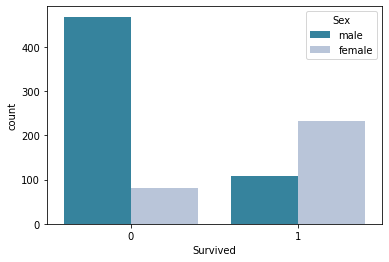

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=data,palette="PuBuGn_r")
#here we use hue=sex so it will divde survied people on basis of sex
#you can see in not survived there are more male than females and more females survived than males
#palette is used for good interactive visualization

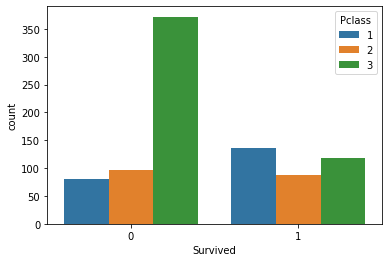

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=data)
#based on passenger class

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


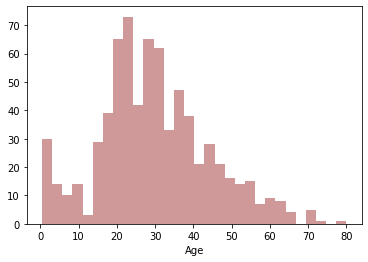

In [ ]:
# using seaborn
sns.distplot(data["Age"].dropna(),kde=False,color="darkred",bins=30)
#bin=30 means there will be 100 bars on the visualization # use 100 to see clear bars
# here use use age to find out people with different ages on ship 
# as we see that there were lot of null value in age we drop that using dropna

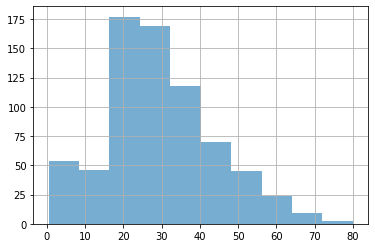

In [ ]:
# using matplotlib
data["Age"].hist(alpha=0.6)
# alpha is used to define how much bright colour u want in that plot

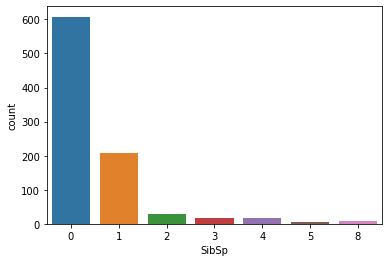

In [ ]:
sns.countplot(x="SibSp",data=data)
# this shows that 600 people (0) traveled with no sibling,spouse
#200 traveled with spouse
#2- says that may be they traveled with 1 sib and 1 spouse
#3- 1-spouse 2 siblings

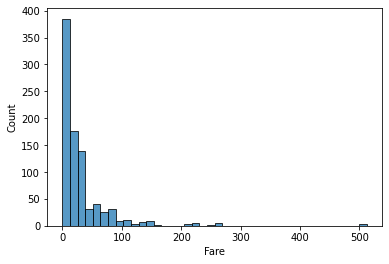

In [ ]:
sns.histplot(x="Fare",data=data,bins=40)

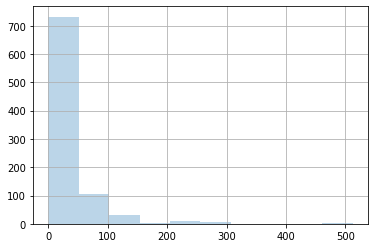

In [ ]:
data["Fare"].hist(alpha=0.3)

In [ ]:
#Data CLeaning

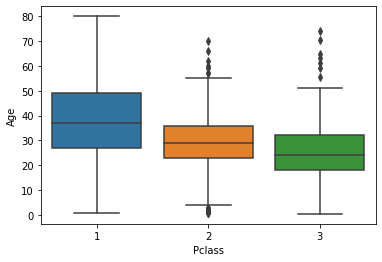

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=data)
#here we find avg age based on class 
#center line in box plot is avg 
# below that is 25%
#above that is 75%

In [ ]:
#using this we are goin to fill null value in age
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
data["Age"]=data[["Age","Pclass"]].apply(impute_age,axis=1)

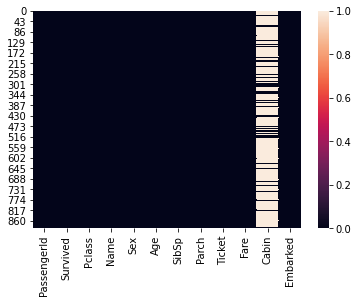

In [ ]:
sns.heatmap(data.isnull())
#here there is no null value in age 

In [ ]:
# we have droped cabin using ----> data.drop("Cabin",axis=1,inplace=True)


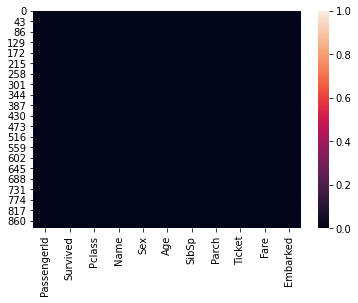

In [ ]:
sns.heatmap(data.isnull())  # now we can see there is no nan value

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#converting categorical feature using .get_dummies
# get dummies will convert into categories like sex has 2 categories and embarked has 3

In [ ]:
embark=pd.get_dummies(data["Embarked"]).head()
sex=pd.get_dummies(data["Sex"]).head()

In [ ]:
# we dropped tabel using this code ----> data.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [ ]:
data=pd.concat([data,sex,embark],axis=1)

In [ ]:
data.head()
# see everything is converted into int this will help ml model to read all data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
